In [1]:
# %%
import os
# Import pca
import dotenv
from ctd.comparison.analysis.tt.tasks.tt_RandomTarget import TT_RandomTarget
from ctd.comparison.analysis.dt.dt import Analysis_DT   
from ctd.comparison.comparison import Comparison


In [2]:

dotenv.load_dotenv(dotenv.find_dotenv())

HOME_DIR = os.environ["HOME_DIR"]
print(HOME_DIR)

pathTT = (
    HOME_DIR
    + "content/trained_models/task-trained/20240529_RandomTarget_NoisyGRU_Memory/max_epochs=2500 latent_size=128 seed=0 learning_rate=0.001/"
)

an_TT = TT_RandomTarget(run_name = "TT", filepath = pathTT)


path_LFADS_Sweep = pathTT + "20240530_LFADS_ExtInputs_RandomTarget_Final/"
subfolders_LFADS = [f.path for f in os.scandir(path_LFADS_Sweep) if f.is_dir()]

path_GRU_Sweep = pathTT + "20240530_GRU_ExtInputs_RandomTarget_Final_Regularized/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240530_NODE_ExtInputs_RandomTarget_Final/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]


/home/csverst/Github/CtDBenchmark/


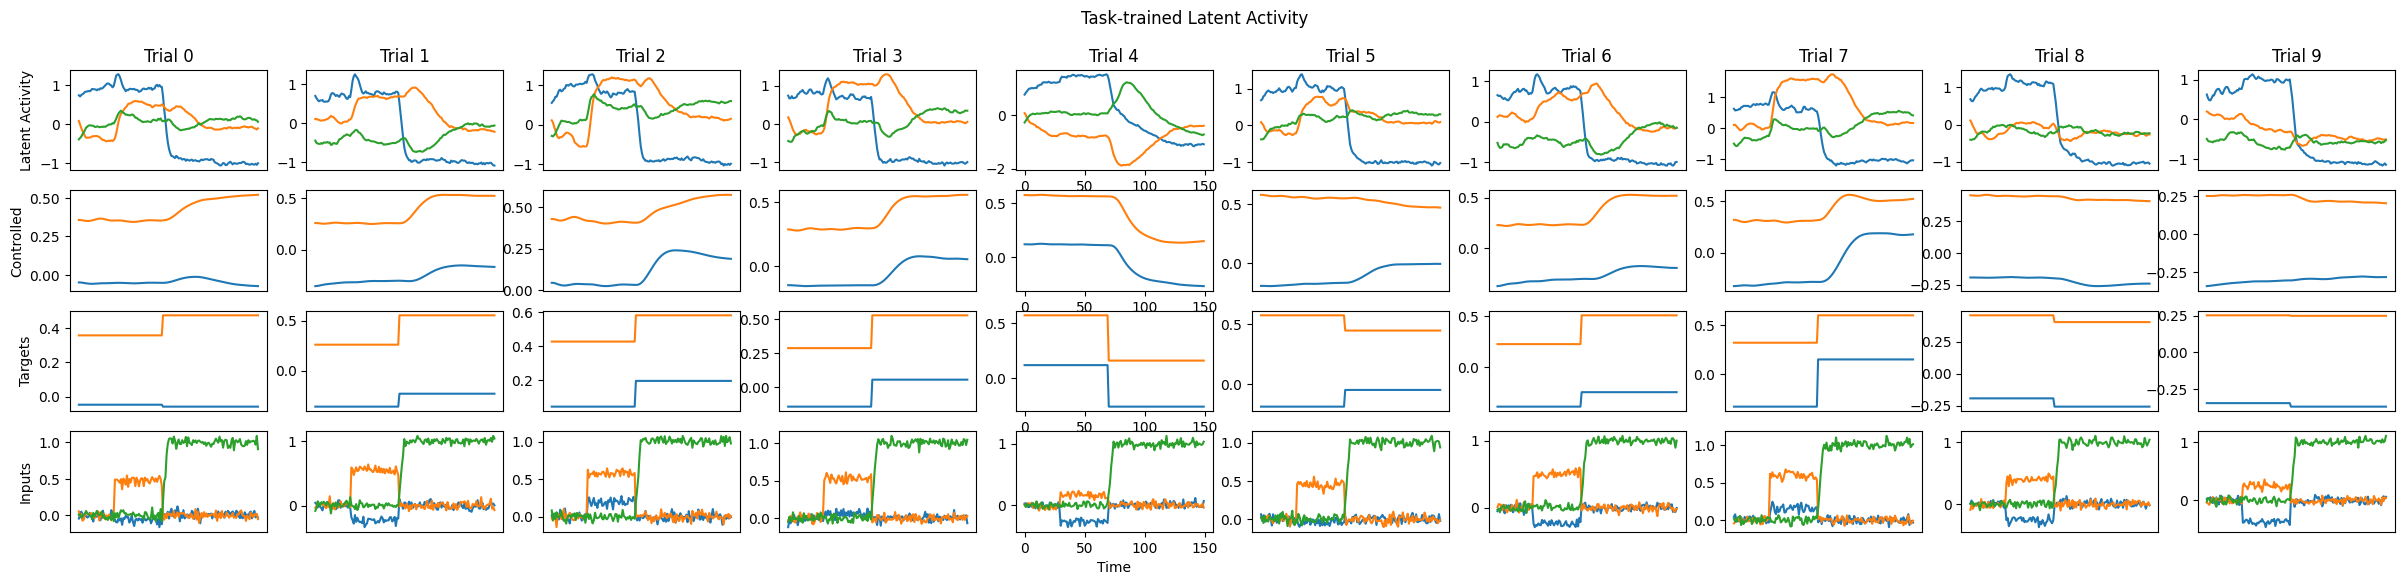

In [6]:
# an_TT.plot_scree()
an_TT.plot_trial_io(num_trials = 10)
# an_TT.plot_trial_latents(num_trials = 4)

In [4]:
comparison = Comparison(comparison_tag="DTRandomTargetTest")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for num, subfolder in enumerate(subfolders_LFADS):
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = f"LFADS_{num}", filepath = subfolder, model_type = "LFADS")
    comparison.load_analysis(analysis_GRU, group = "LFADS")

for num, subfolder in enumerate(subfolders_GRU):
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = f"GRU_{num}", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_GRU, group = "GRU")

for num, subfolder in enumerate(subfolders_NODE):
    subfolder = subfolder + "/"
    analysis_NODE = Analysis_DT(run_name = f"NODE_{num}", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_NODE, group = "NODE")

Working on 1 of 16: TT
Group: TT
Working on 2 of 16: LFADS_0
Group: LFADS
Rate R2: 0.9237522322240234
State R2: 0.4765165399241891
Working on 3 of 16: LFADS_1
Group: LFADS
Rate R2: 0.9223841183282155
State R2: 0.4800104702731524
Working on 4 of 16: LFADS_2
Group: LFADS
Rate R2: 0.9235508431552382
State R2: 0.47602162754377164
Working on 5 of 16: LFADS_3
Group: LFADS
Rate R2: 0.9228263865401486
State R2: 0.4574393645470486
Working on 6 of 16: LFADS_4
Group: LFADS
Rate R2: 0.9237506352083862
State R2: 0.47704861366866985
Working on 7 of 16: GRU_0
Group: GRU
Rate R2: 0.8473770806904243
State R2: 0.43391237851290476
Working on 8 of 16: GRU_1
Group: GRU
Rate R2: 0.8528157315400969
State R2: 0.44729802349618974
Working on 9 of 16: GRU_2
Group: GRU
Rate R2: 0.8429477570078343
State R2: 0.43164034234415755
Working on 10 of 16: GRU_3
Group: GRU
Rate R2: 0.8495802349620569
State R2: 0.4432200379570376
Working on 11 of 16: GRU_4
Group: GRU
Rate R2: 0.8558821369403095
State R2: 0.45548709303290347

array([[0.        , 0.        ],
       [0.92375223, 0.47651654],
       [0.92238412, 0.48001047],
       [0.92355084, 0.47602163],
       [0.92282639, 0.45743936],
       [0.92375064, 0.47704861],
       [0.84737708, 0.43391238],
       [0.85281573, 0.44729802],
       [0.84294776, 0.43164034],
       [0.84958023, 0.44322004],
       [0.85588214, 0.45548709],
       [0.89239925, 0.48033043],
       [0.89447789, 0.56425295],
       [0.8910141 , 0.49410935],
       [0.89533982, 0.53749568],
       [0.89410863, 0.53586646]])

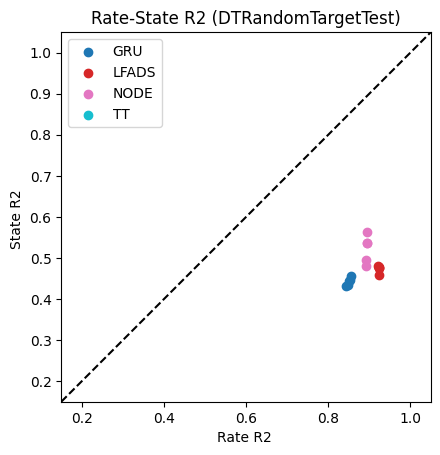

In [5]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "o",
}
comparison.compare_rate_state_r2(plot_dict = plot_dict)